In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("../../DATA/rock_density_xray.csv")

In [42]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [43]:
df.columns = ['Signal', 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

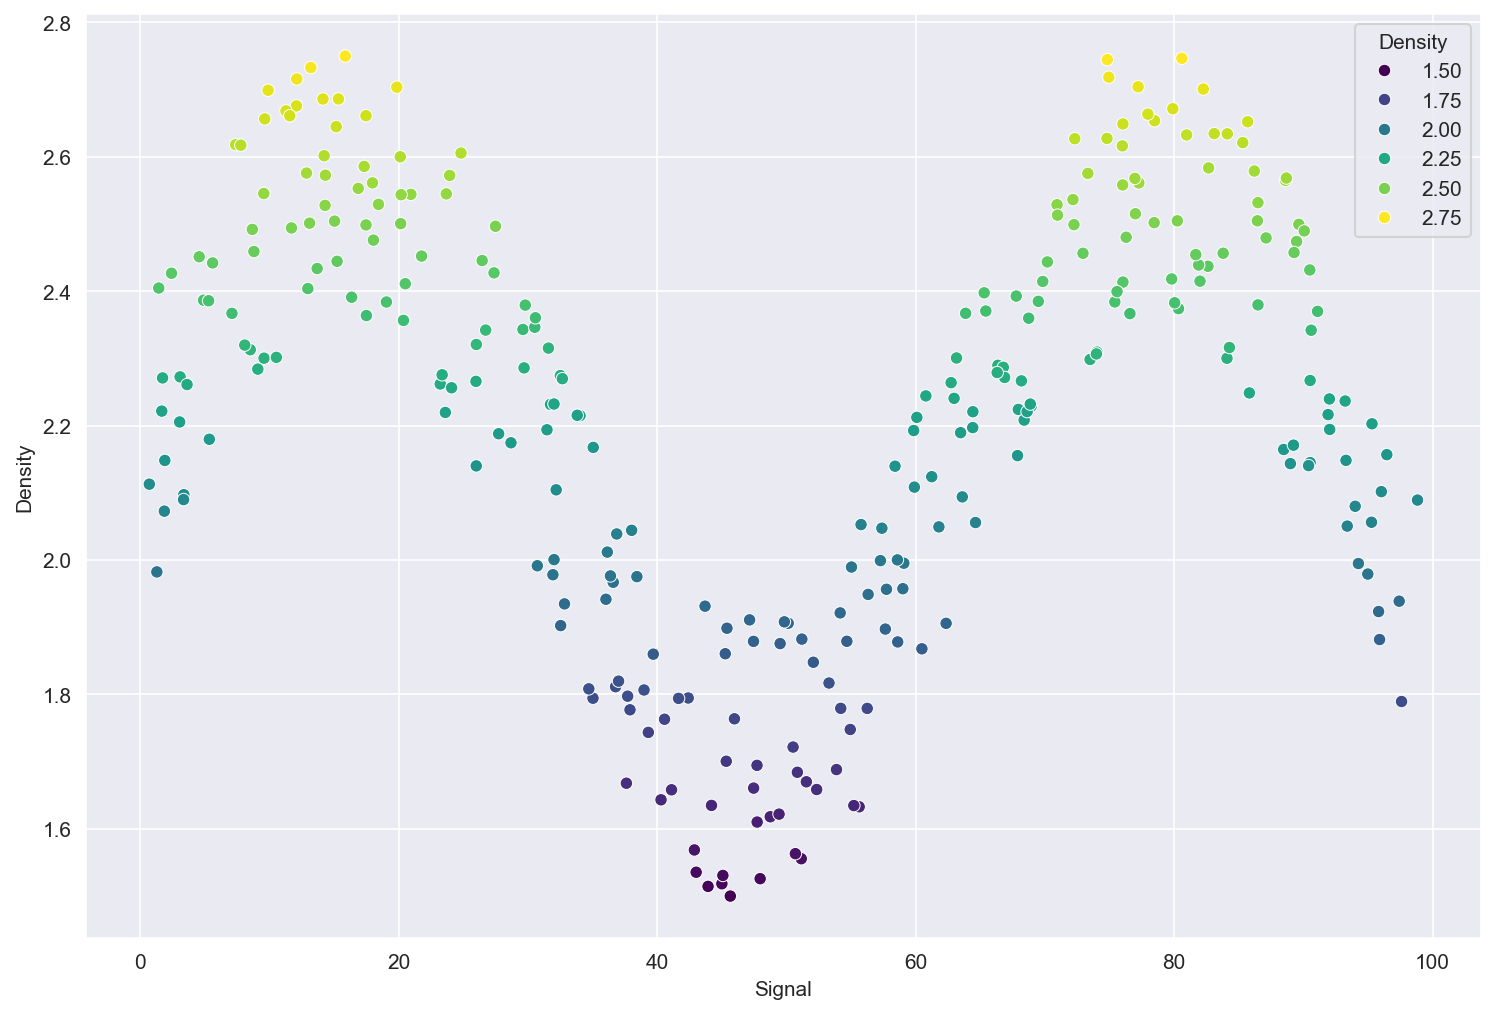

In [44]:
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(data=df, x='Signal', y='Density', hue='Density', palette='viridis')

In [45]:
X = df['Signal'].values.reshape(-1, 1)

In [46]:
y = df['Density']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr_model = LinearRegression(n_jobs=-1)

In [51]:
lr_model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [52]:
lr_preds = lr_model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
MSE = mean_squared_error(y_test, lr_preds)

In [55]:
MSE

0.08573266085277201

In [56]:
signal_range = np.arange(0, 100)

In [57]:
lr_output = lr_model.predict(signal_range.reshape(-1, 1))

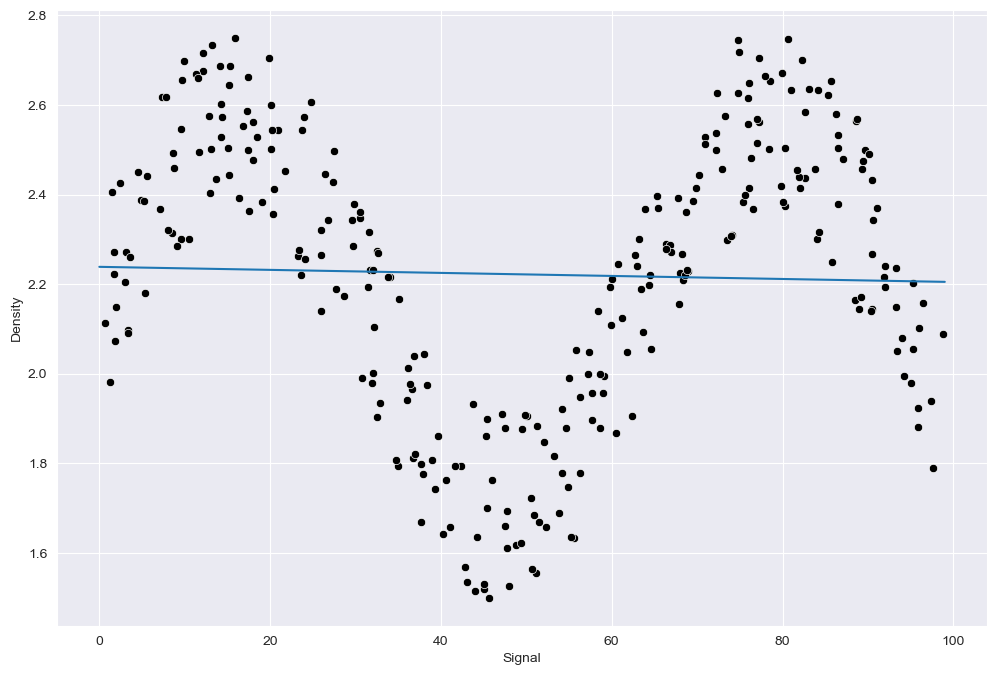

In [58]:
plt.figure(figsize=(12, 8), dpi=100)
sns.scatterplot(x='Signal', y='Density', data=df, color='black')
plt.plot(signal_range, lr_output)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression(n_jobs=-1)

In [61]:
def run_model(model,X_train,y_train,X_test,y_test):

    model.fit(X_train,y_train)

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))


    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.29280140172610514


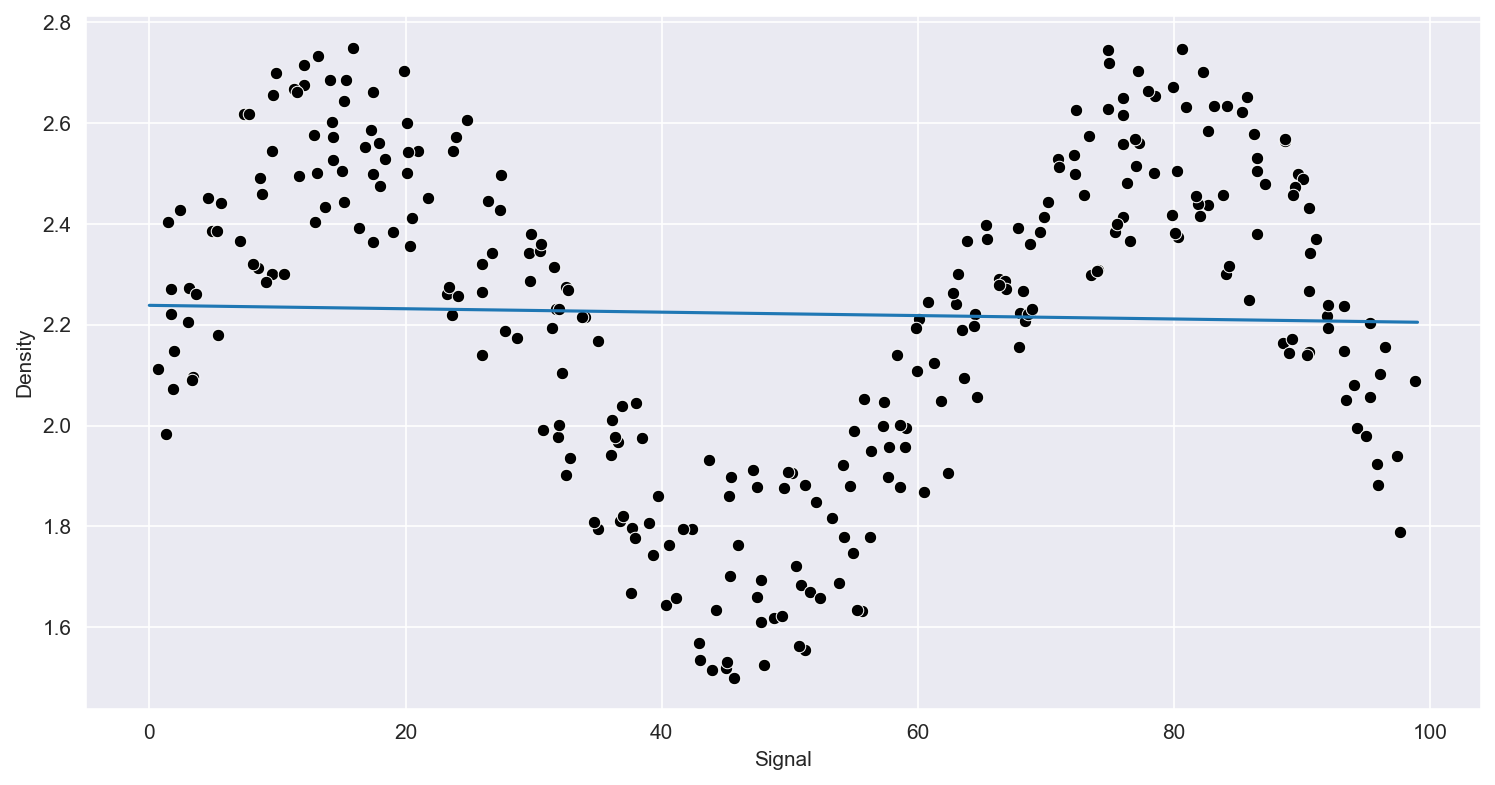

In [62]:
run_model(model,X_train,y_train,X_test,y_test)

In [63]:
from sklearn.pipeline import  make_pipeline

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression(n_jobs=-1))

RMSE : 0.2855173191826419


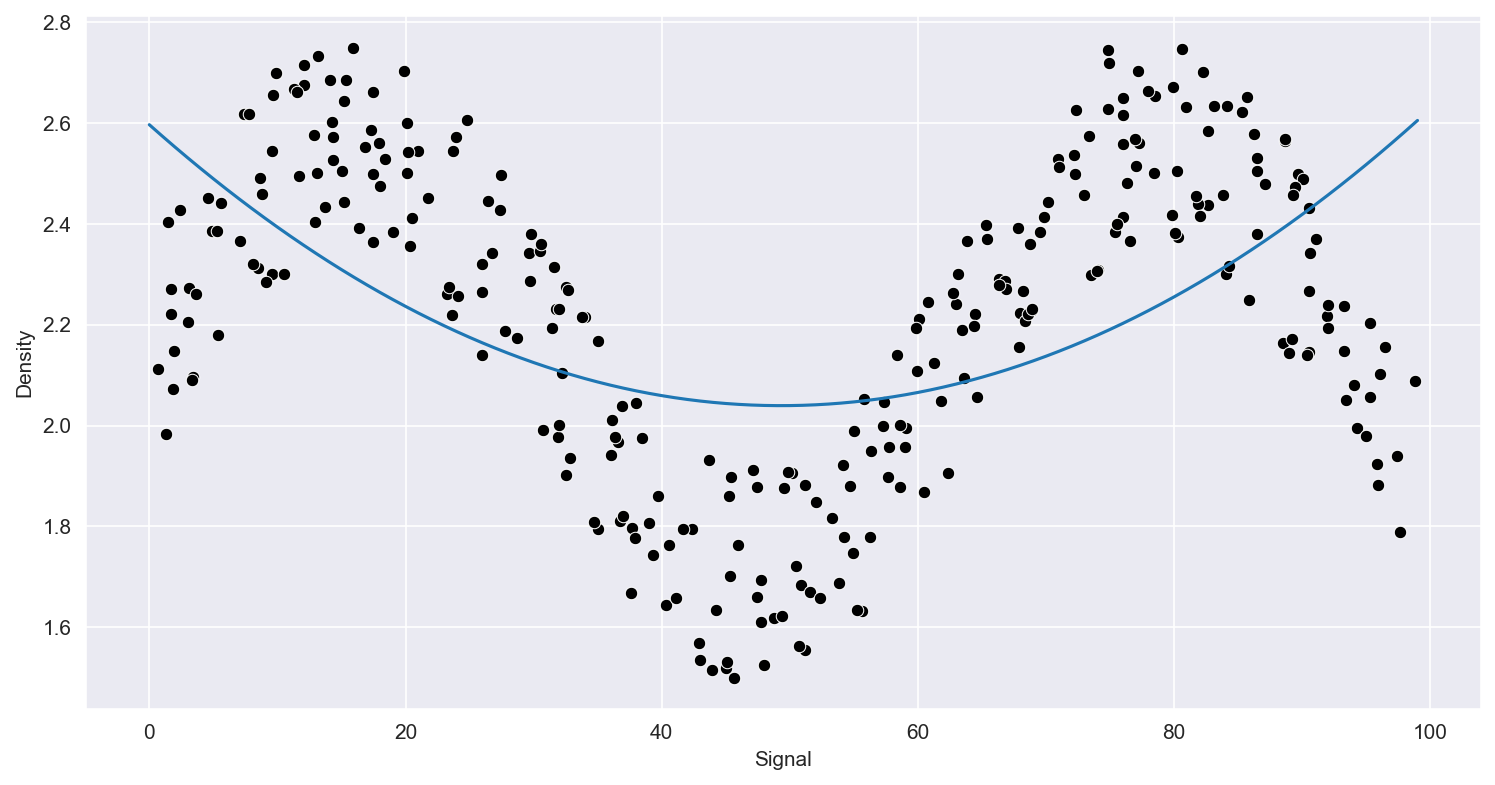

In [66]:
run_model(pipe, X_train, y_train, X_test, y_test)

RMSE : 0.13371978506267412


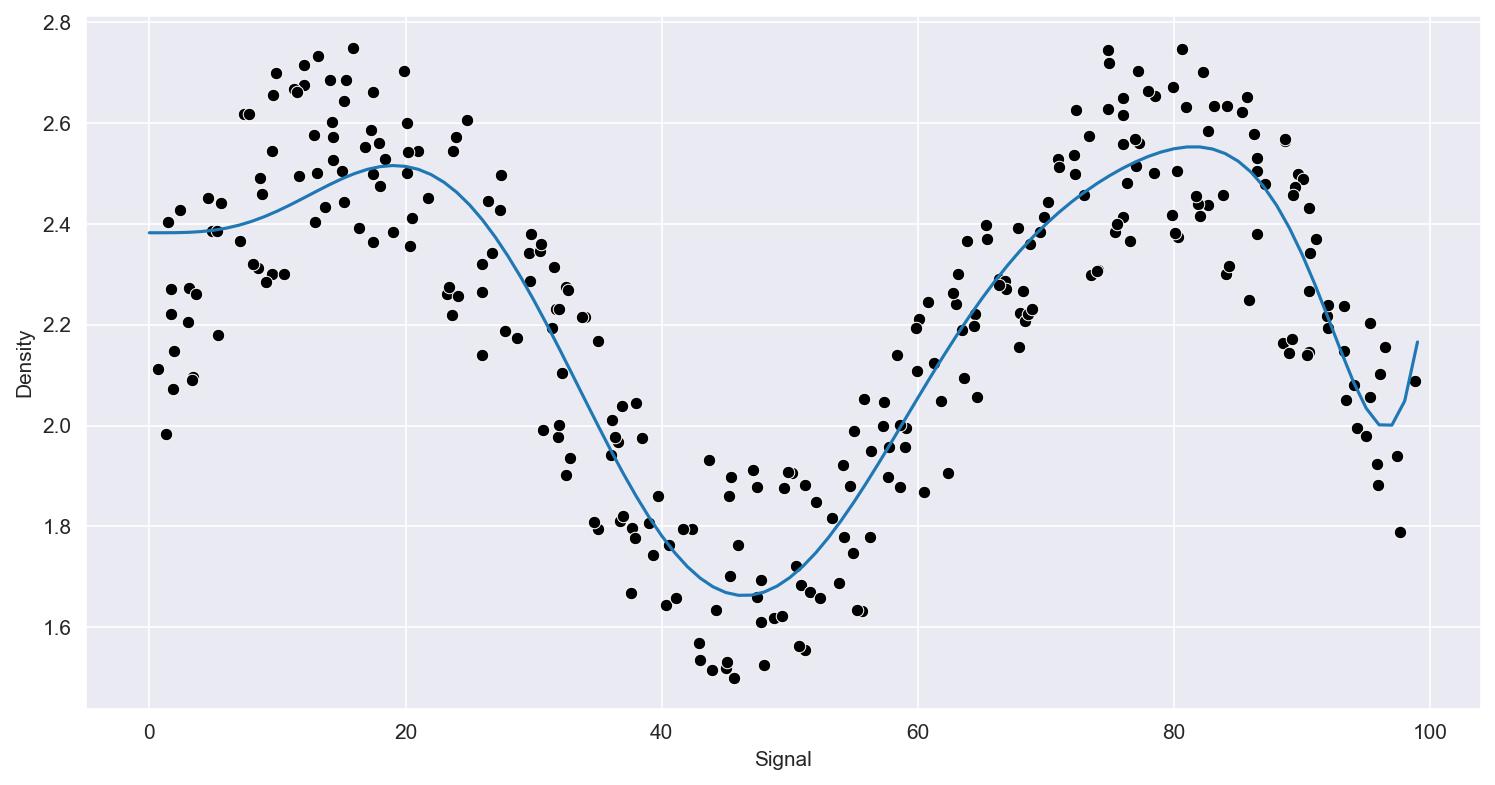

In [68]:
pipe = make_pipeline(PolynomialFeatures(10), LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [73]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.16153547162673088
RMSE : 0.1400166117231861
RMSE : 0.1408050741503751


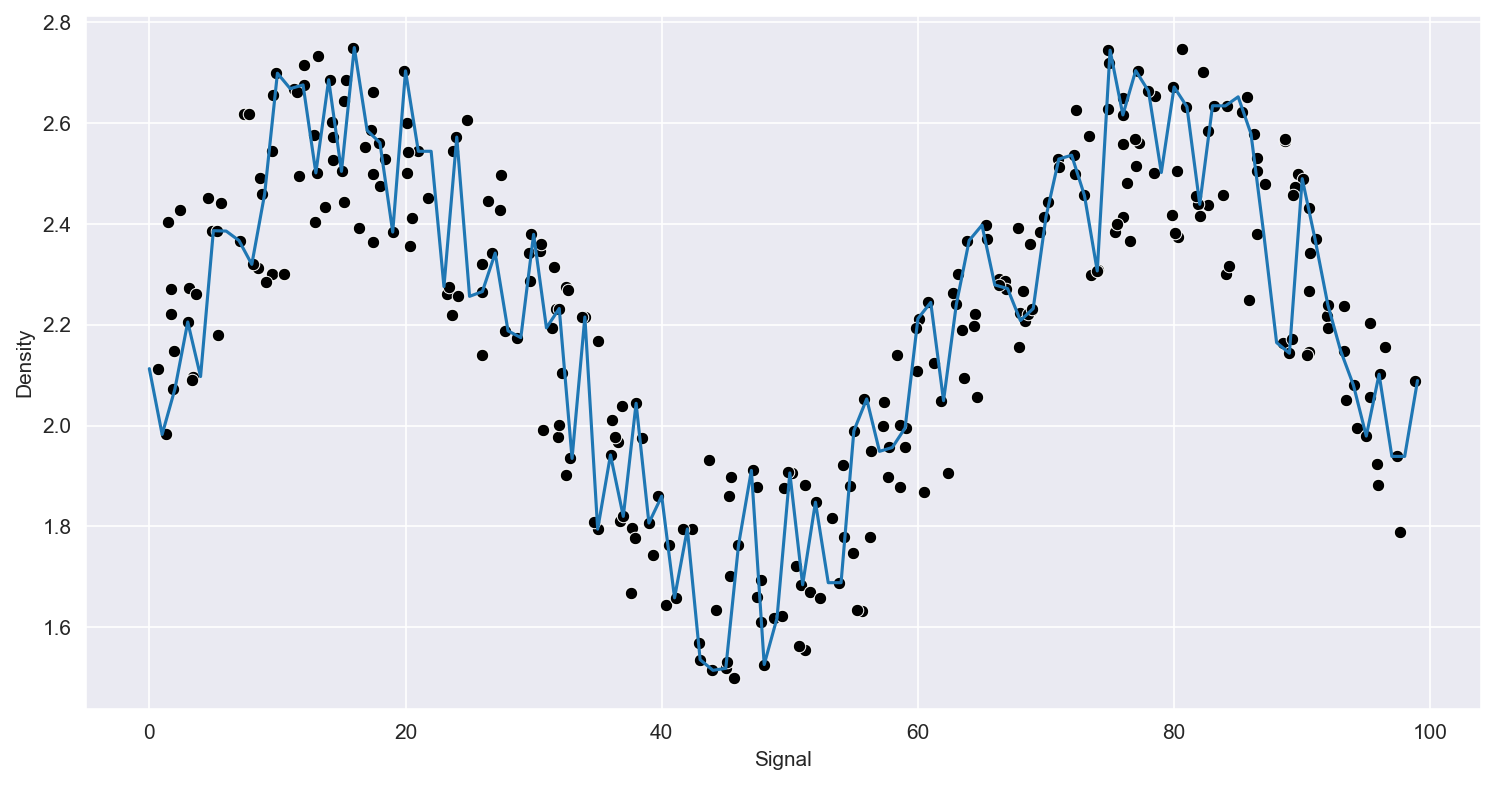

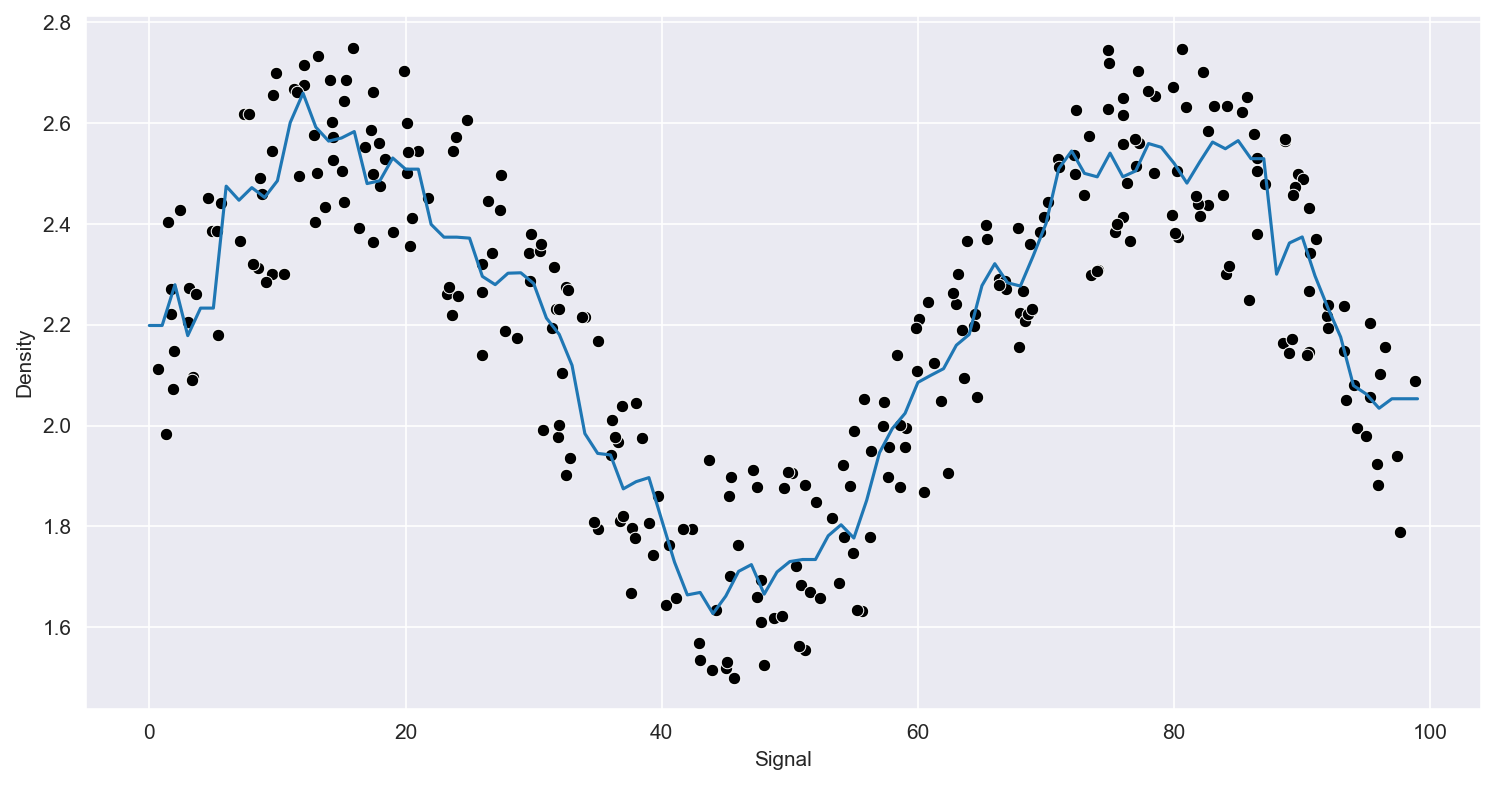

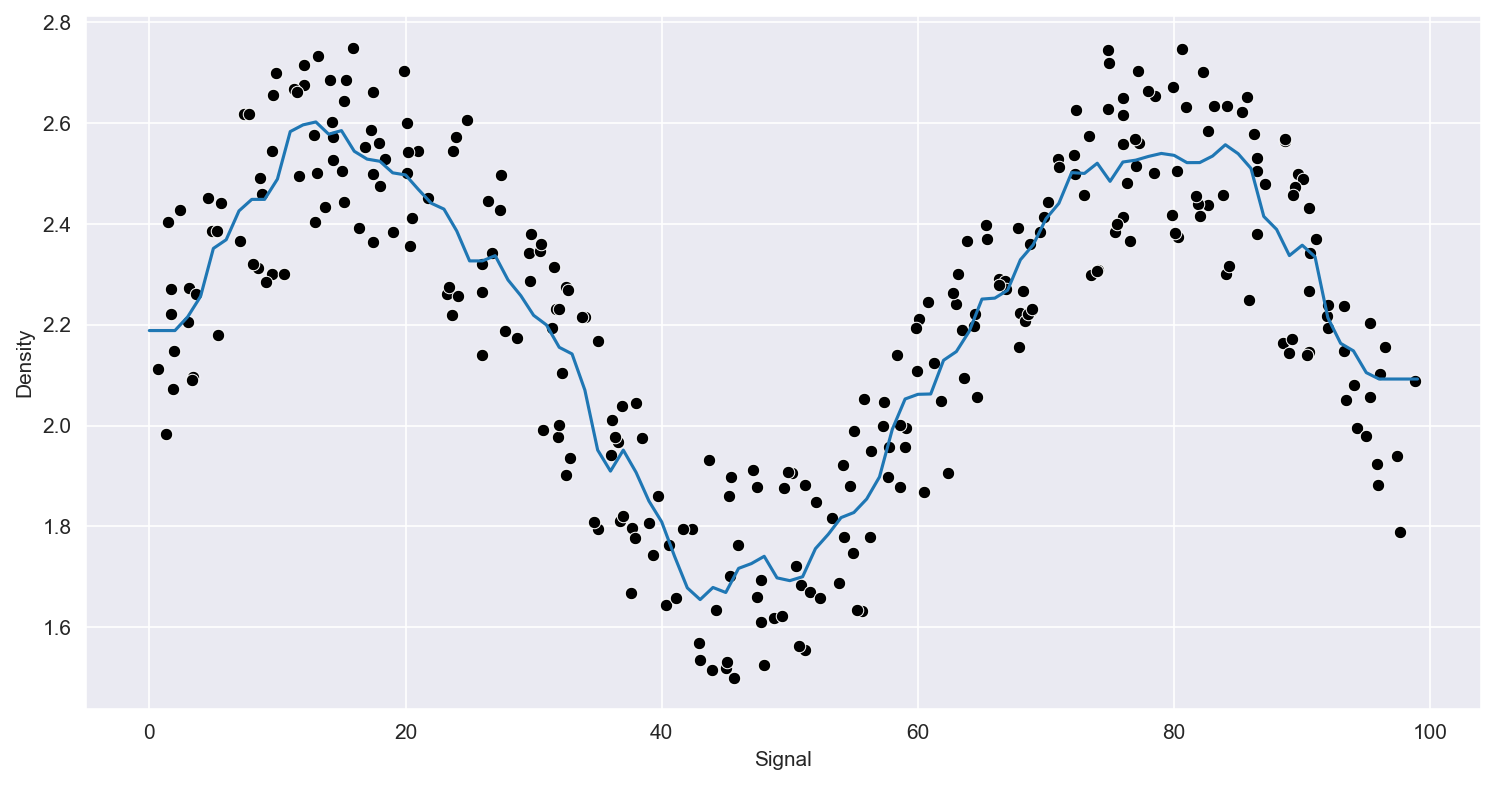

In [74]:
preds = {}
k_values = [1,5,10]
for n in k_values:

    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
model = DecisionTreeRegressor()

RMSE : 0.13371978506267412


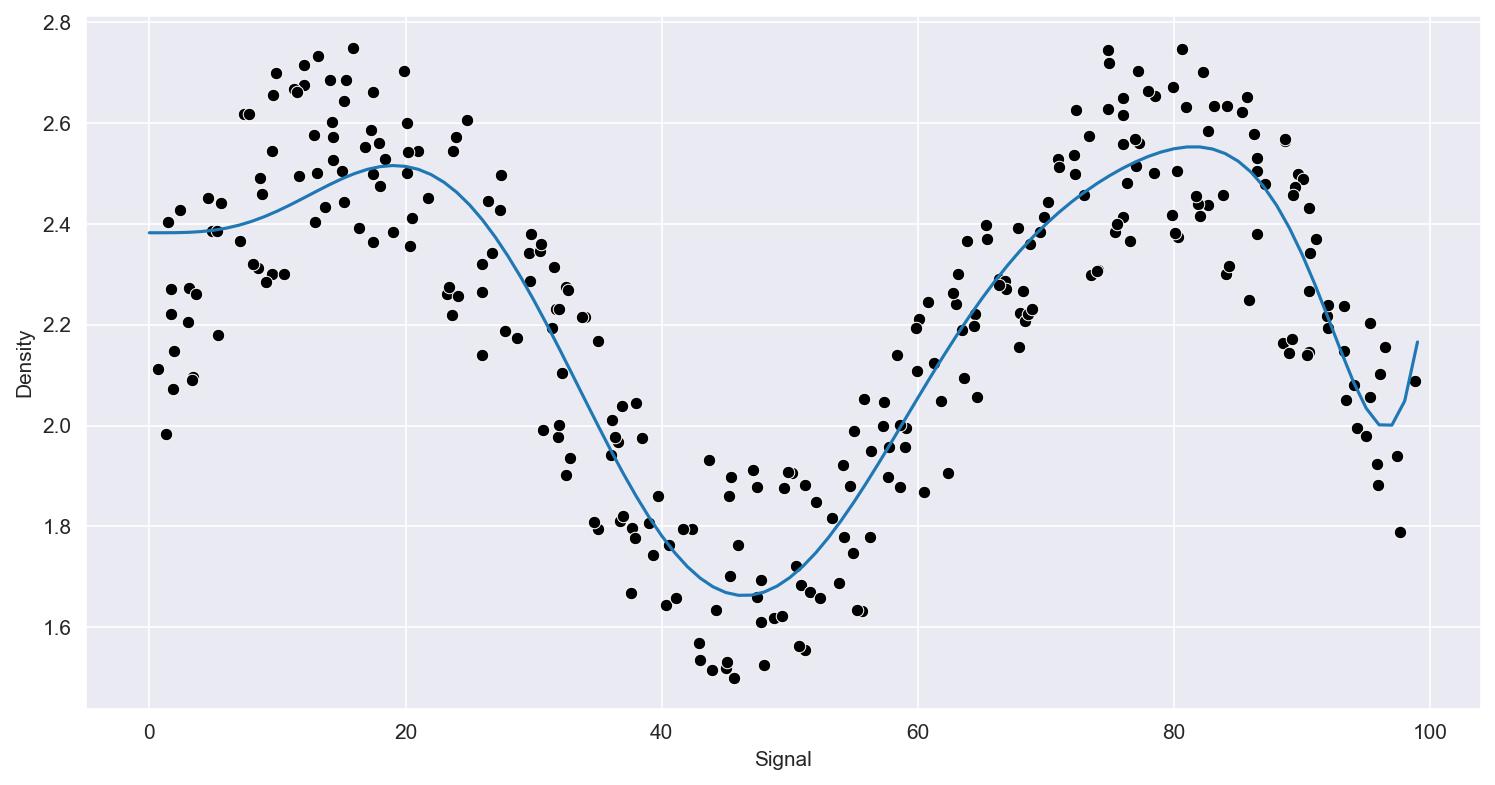

In [77]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [78]:
model.get_n_leaves()

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [79]:
from sklearn.svm import SVR

In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [83]:
grid = GridSearchCV(svr, param_grid)

RMSE : 0.13336766447799286


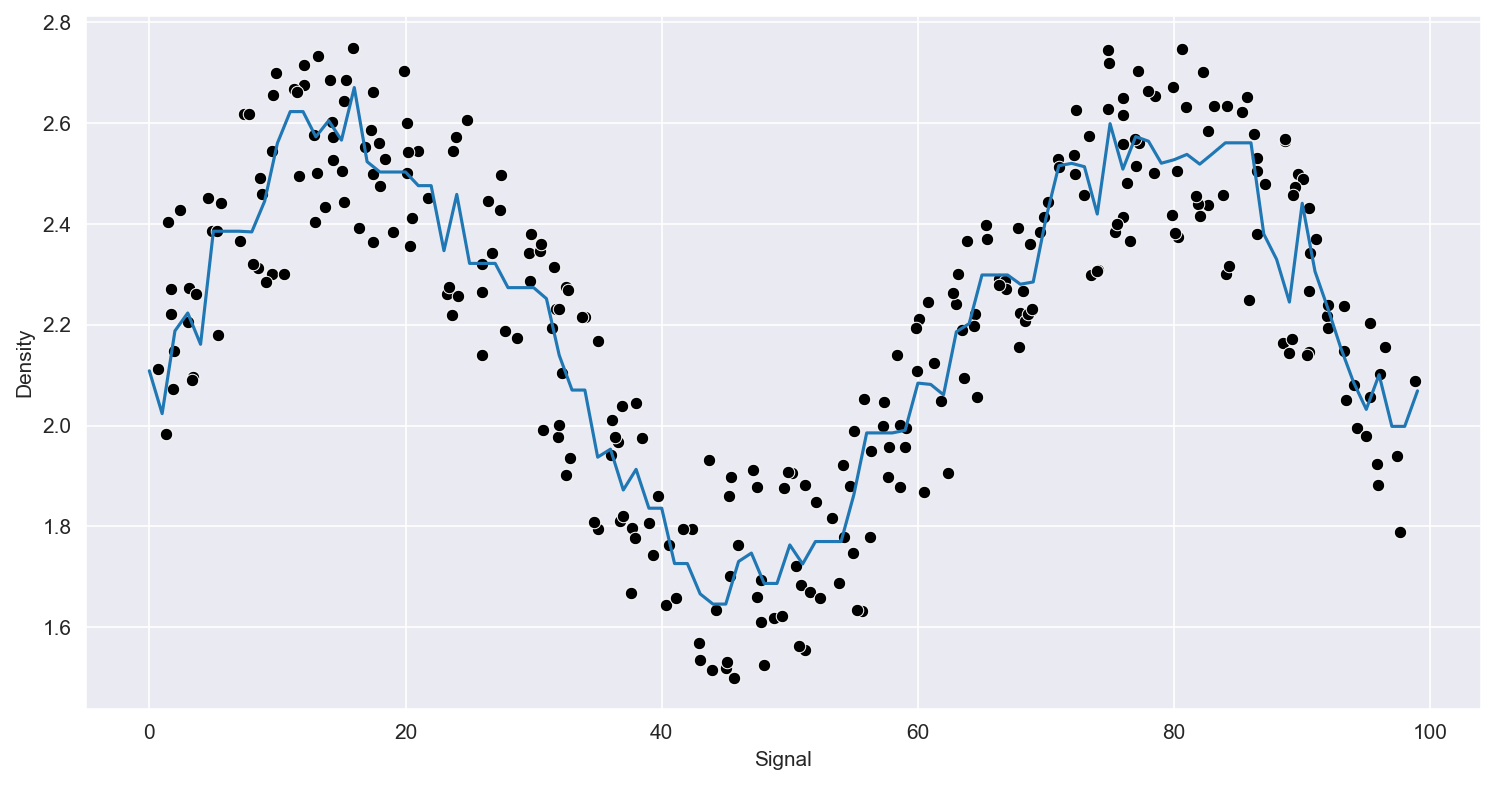

In [91]:
run_model(model,X_train,y_train,X_test,y_test)

In [92]:
grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [87]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.1494018725849034
RMSE : 0.14201379930217578
RMSE : 0.14482162608307705


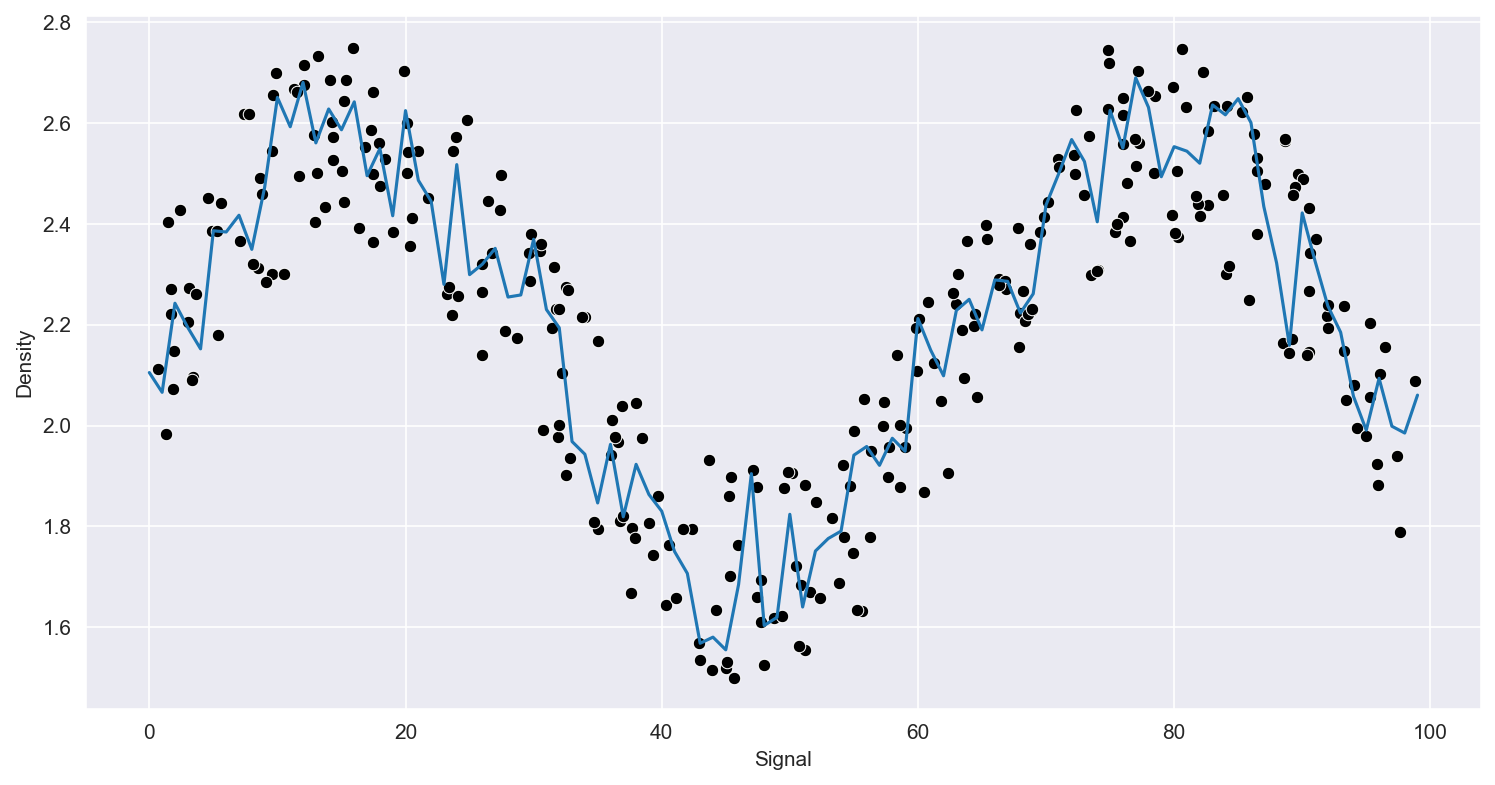

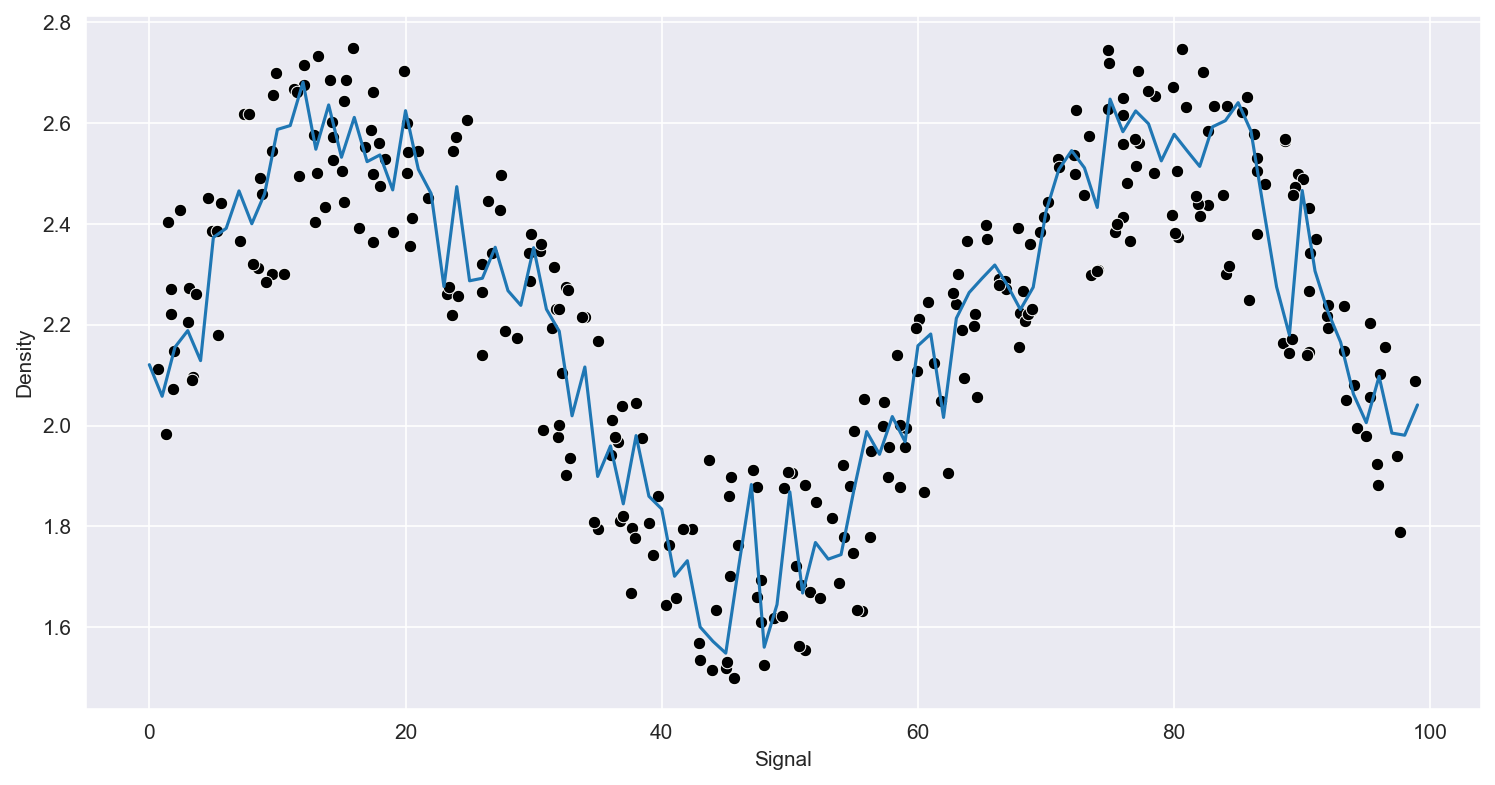

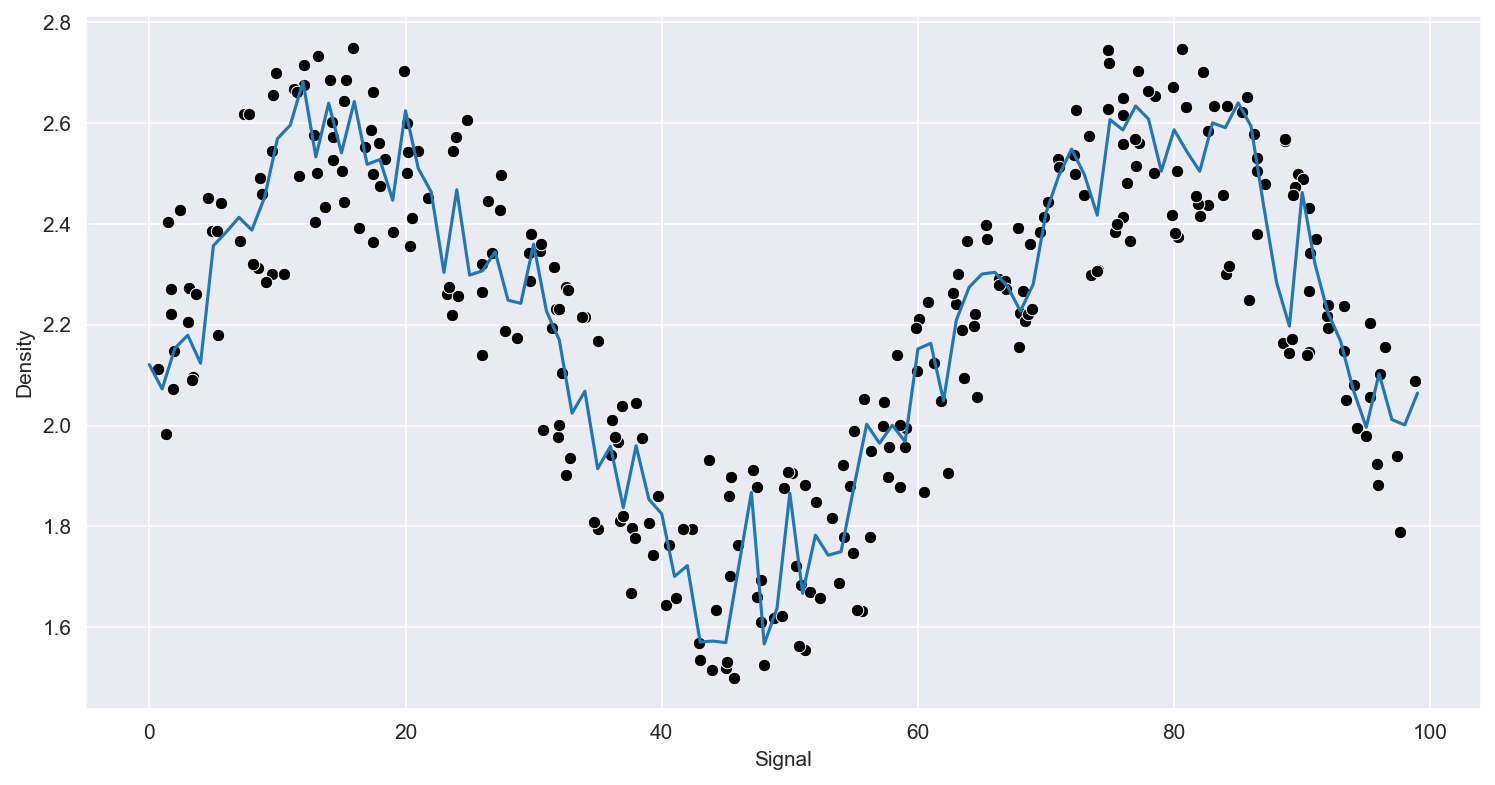

In [93]:
trees = [10, 50, 100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n, n_jobs=-1)

    run_model(model,X_train,y_train,X_test,y_test)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
model = GradientBoostingRegressor()

RMSE : 0.14209909437506058


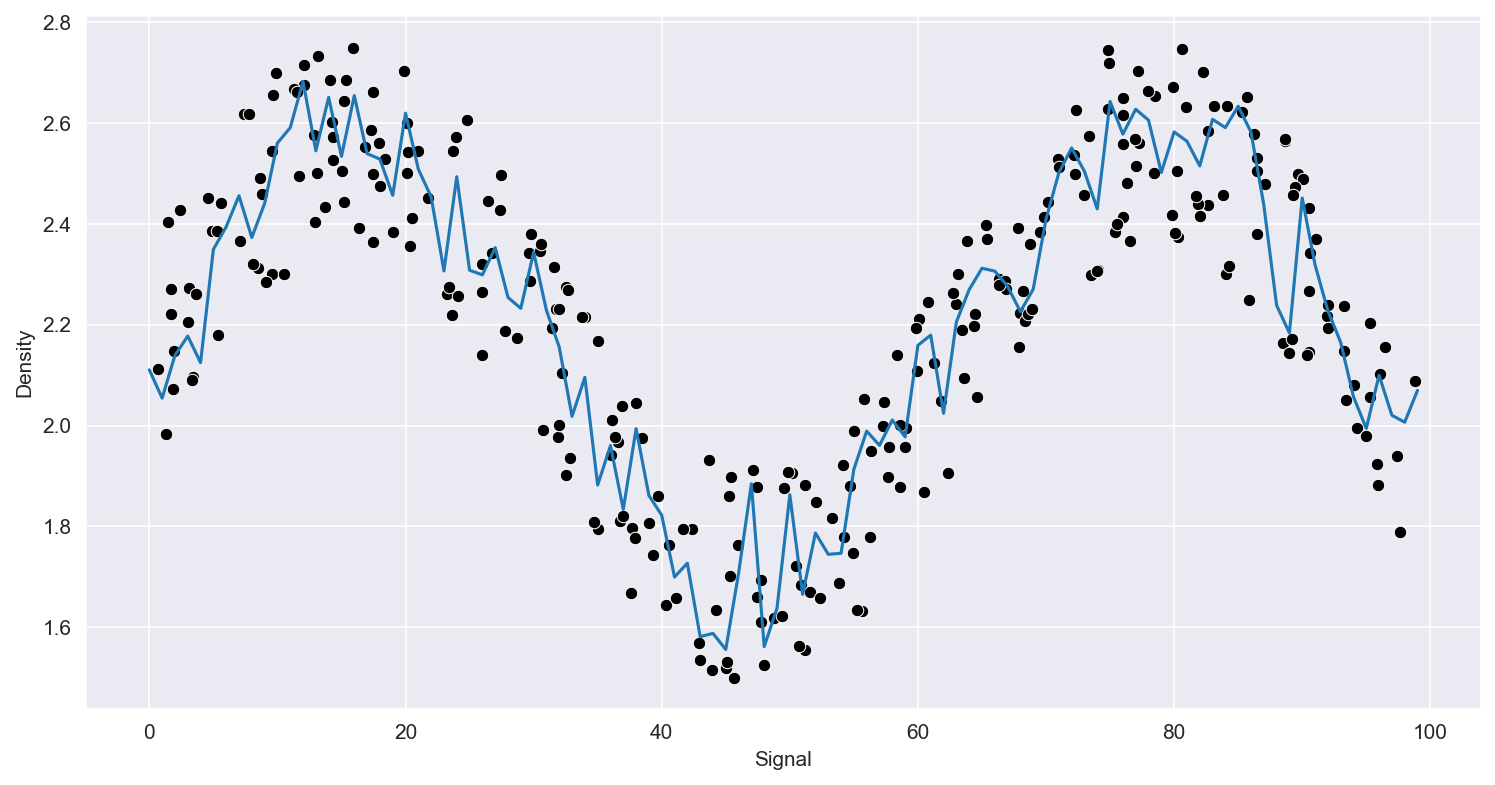

In [95]:
run_model(model,X_train,y_train,X_test,y_test)

In [96]:
from sklearn.ensemble import AdaBoostRegressor

In [97]:
model = AdaBoostRegressor()

RMSE : 0.1278565374659359


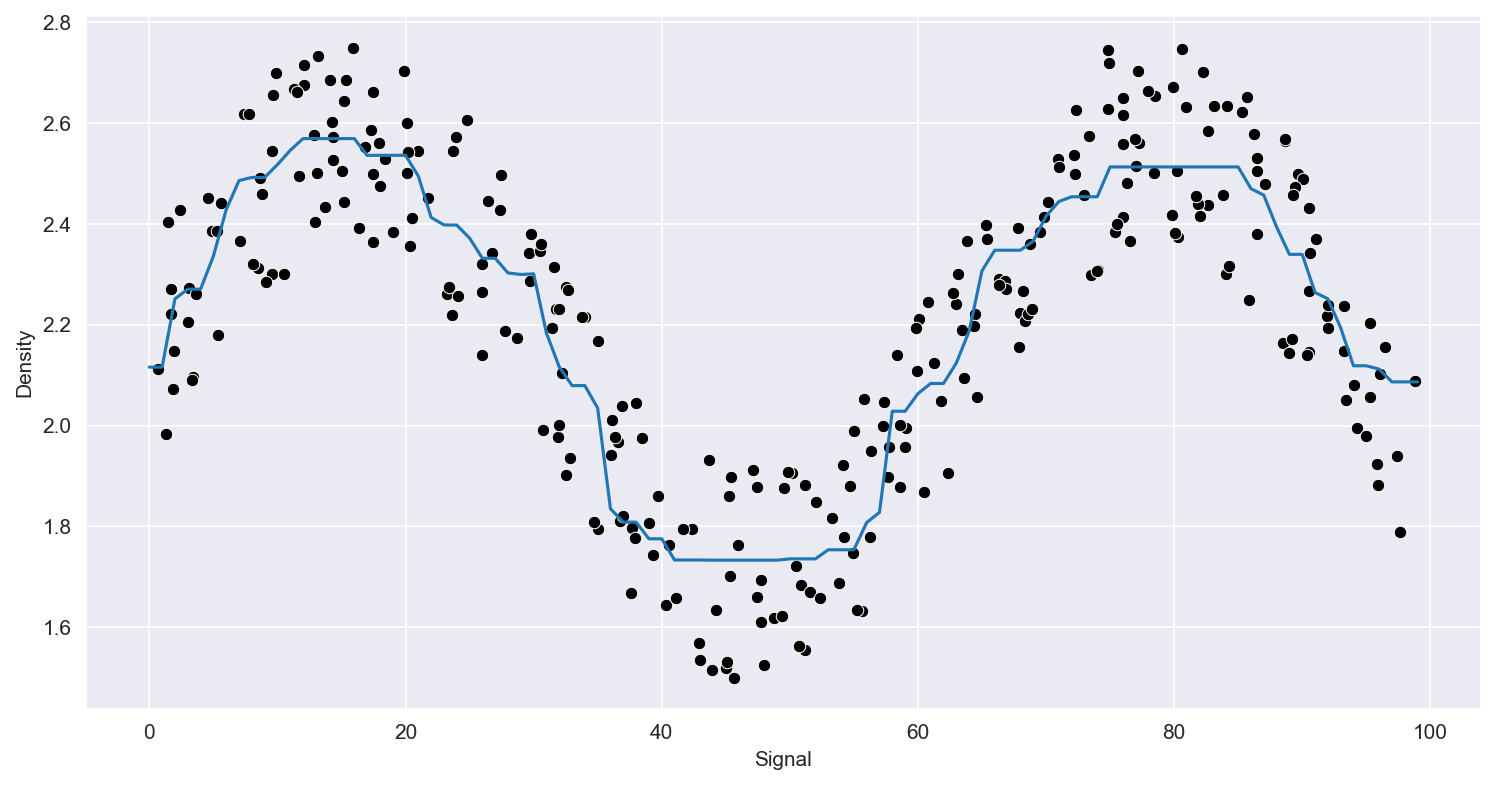

In [98]:
run_model(model,X_train,y_train,X_test,y_test)